# **Updating/Instaling Libraries**

In [ ]:
!pip install keras
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu
!pip install xlrd==1.2.0
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have ten

# **Importing Libraries**

In [ ]:
!pip install unidecode
import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode # This line should now work as the module has been installed
import os
from time import time

from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation, Embedding, Flatten, Bidirectional, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, classification_report

from nltk.corpus import stopwords
import nltk
import re
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.5 MB/s eta 0:00:00


# **Loading Dataset**

In [ ]:
# Install imbalanced-learn if you don't have it
# !pip install imbalanced-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
df = pd.read_csv("/content/drive/MyDrive/Bengali quotes database/all_quotes_cleaned.csv")  # Adjust the path

# Assuming you have 27 categories, but only a few samples for some categories
# For demonstration, we'll assume 'category_en' has only 'life' category so far
# You can adjust your actual categories in the 'category_en' column

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Perform oversampling
X_resampled, y_resampled = ros.fit_resample(df[['quotes']], df['category_en'])

# Convert the result back to a DataFrame
df = pd.DataFrame({'quotes': X_resampled['quotes'], 'category_en': y_resampled})

print(df['category_en'].value_counts())  # To check if the data is balanced now

# # Save the balanced dataset to a new CSV file
# df.to_csv('balanced_data.csv', index=False)


category_en
life             187
love             187
frinedship       187
success          187
nature           187
relation         187
rain             187
sky              187
moments          187
conjugal_life    187
law              187
illness          187
revenge          187
soul             187
decision         187
atheist          187
democracy        187
full_moon        187
change           187
dream            187
tension          187
examination      187
city             187
insul            187
depression       187
money            187
cloud            187
Name: count, dtype: int64


In [ ]:
df.head()

,quotes,category_en
0,দায়িত্ব নিতে ভয় পাবেন না। তাহলেই নতুন কিছু শ...,life
1,"অনুকরণ নয়, অনুসরণ নয়, নিজেকে খুঁজুন, নিজেকে ...",life
2,"যাহা তুমি দেখাও, তার চেয়ে বেশি তোমার থাকা উচি...",life
3,"ভাগ্য বলে কিছুই নেই, প্রত্যেকের চেষ্টা ও যত্নে...",life
4,সুযোগের সাথে জড়িত ঝুঁকি গ্রহনে সাহসী হোন।,life


In [ ]:
print(df.value_counts())

quotes                                                                                                                           category_en
কষ্টের মেঘগুলো বৃষ্টি হয়ে ঝরে এই শহরে সবুজ পাতার হলুদবর্ণ দেয় যে নিমিষে সরিয়ে ।                                                  rain           17
গ্রামের বাদলা দিনের দিনগুলোয় চাল ভাজা আর নারকেল শহরের মানুষগুলো পায় না যে এর স্বাদ কেমন যেন সব বেআক্কেল….                        rain           15
তুমিহীন আজ আমি একা পথে হাটি পায়ের নিচে আজ খালি ভেজা মাটি ….                                                                      rain           15
রিমঝিম রিমঝিম এই বাদল দিনে তুমি ছাড়া কিছুতে কেন মন লাগে না ।। ঝিরঝির হাওয়া চঞ্চল মেঘে মন চায় মন চায় তোমাকে নিতে চিনে           rain           14
ঝুম বৃষ্টি যেন রিনিঝিনি নুপুরের ধ্বনি মন পাগল করা অপরূপ সৃষ্টি । উদাস হয়ে শুধুই তাকিয়ে থাকা ভেতরটা আজ কেন এত লাগে ফাঁকা?         rain           13
                                                                                                                            

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df.head()

,quotes,category_en
0,দায়িত্ব নিতে ভয় পাবেন না। তাহলেই নতুন কিছু শ...,life
1,"অনুকরণ নয়, অনুসরণ নয়, নিজেকে খুঁজুন, নিজেকে ...",life
2,"যাহা তুমি দেখাও, তার চেয়ে বেশি তোমার থাকা উচি...",life
3,"ভাগ্য বলে কিছুই নেই, প্রত্যেকের চেষ্টা ও যত্নে...",life
4,সুযোগের সাথে জড়িত ঝুঁকি গ্রহনে সাহসী হোন।,life


In [ ]:
# Define your feature (X) and target (y)
X = df['quotes']  # Replace 'text_column' with your actual text feature column
y = df['category_en']  # Replace 'label_column' with your actual target column

# Split the dataset: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Combine X_train and y_train into a single DataFrame for the training set
df_train = pd.DataFrame({'quotes': X_train, 'category_en': y_train})

# Combine X_test and y_test into a single DataFrame for the test set
df_test = pd.DataFrame({'quotes': X_test, 'category_en': y_test})

# Check the shape of the split datasets
print(f"Train set shape: {df_train.shape}")
print(f"Test set shape: {df_test.shape}")

Train set shape: (4039, 2)
Test set shape: (1010, 2)


In [ ]:

df_train['count'] = df_train['quotes'].str.split().str.len()
df_test['count'] = df_test['quotes'].str.split().str.len()
display(df_train)
df_train.head()
df_train.describe()
df_train.info()
print(df_train.category_en.unique())

,quotes,category_en,count
3499,"আইনকে এককভাবে তৈরি করা হয়েছিল, যারা এটি বোঝেন...",law,13
4785,"আত্মা কভু নয় ভিন্ন, ভিন্নতা আনে শুধু বর্ণভেদ ...",soul,49
3556,সেই সত্যিকারের মানুষ যে অন্যের দোষত্রুটি নিজেক...,life,11
3008,"বন্ধু তুমি আমার হৃদয়ের বাধন, আছো তুমি, থাকবে আ...",frinedship,53
2187,আপনি যদি চান আপনার দাম্পত্য জীবন সুখী করতে পার...,conjugal_life,20
...,...,...,...
4629,*আমার একলা আকাশ থমকে গেছেরাতের কাছে এসেশুধু তো...,sky,10
1693,"আমি মিথিলার অনন্ত হবো, ধাপে ধাপে বদলে নিবো নিজ...",change,46
531,"সম্পর্ক সুন্দর দূরের থেকে ,চাই না যেতে কারও কা...",relation,20
310,"বন্ধু তুমি একা হলে আমায় দিও ডাক, গল্প করব তোমা...",frinedship,26


<class 'pandas.core.frame.DataFrame'>
Index: 4039 entries, 3499 to 1180
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   quotes       4039 non-null   object
 1   category_en  4039 non-null   object
 2   count        4039 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 126.2+ KB
['law' 'soul' 'life' 'frinedship' 'conjugal_life' 'revenge' 'relation'
 'examination' 'sky' 'love' 'depression' 'tension' 'atheist' 'decision'
 'moments' 'illness' 'insul' 'success' 'democracy' 'nature' 'dream' 'city'
 'full_moon' 'rain' 'change' 'cloud' 'money']


In [ ]:
display(df_test)
df_test.head()
df_test.describe()
df_test.info()

,quotes,category_en,count
618,"*আকাশে তো মেঘ আসবেই, ঝড়ের ভয়ে কেন দমে থাকবো?",sky,9
2197,বিধির বিধান অনুসরন আধ্যাত্মিক দর্শনদুটি স্বত্ত...,conjugal_life,38
3132,"আমি পূর্ণিমা চাঁদ হলে, সারারাত জেগে জেগে শুধু ...",full_moon,24
1739,আমরা চাইলেও বর্তমান সময় পরিবর্তন করে অতীতে যা...,change,10
3768,“সুন্দর মুহূর্ত পাওয়া যাক যাতে ভরপুর আনন্দ এব...,moments,10
...,...,...,...
4779,শরীরের জন্য খাবারই কেবল যথেষ্ট নয় বরং আত্মার ...,soul,13
213,একেকজনের ভালোবাসার বহিঃপ্রকাশ তো একেক রকম। কার...,love,21
394,কখনো হাল ছেড়ে দিও না! এখনকার এই দাঁতে দাঁত চে...,success,18
3454,"সর্বোপরি, মানুষ সকল প্রাণীর মধ্যে শ্রেষ্ঠতম; ত...",law,13


<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 618 to 3719
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   quotes       1010 non-null   object
 1   category_en  1010 non-null   object
 2   count        1010 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 31.6+ KB


# **Stopwords Removal**

In [ ]:
def stopwordRemoval(text):
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop]

    out=' '.join(stm)

    return str(out)

In [ ]:
data1 =pd.read_excel('/content/drive/MyDrive/Bengali quotes database/stopwords_bangla.xlsx')
display(data1)
stop = data1['words'].tolist()

,Unnamed: 0,words
0,0,অই
1,1,অগত্যা
2,2,অত: পর
3,3,অতএব
4,4,অথচ
...,...,...
727,727,হয়েই
728,728,হয়েছিল
729,729,হয়েছে
730,730,হয়েছেন


In [ ]:
#df_train['cleanText'] = df_train.cleanText.apply(lambda x: stopwordRemoval(str(x)))


In [ ]:
#df_test['cleanText'] = df_test.cleanText.apply(lambda x: stopwordRemoval(str(x)))

# **Stemming**

In [ ]:
#make sure to turn on internet on your kernel
#importing stemmer
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

In [ ]:
#df_train['cleanText']=df_train['cleanText'].apply(stem_text)
#df_test['cleanText']=df_test['cleanText'].apply(stem_text)

# **Changing Labels to Numbers**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the combined target data
label_encoder.fit(pd.concat([y_train, y_test]))

# Encode the labels in the training and test sets
df_train['category_en'] = label_encoder.transform(df_train['category_en'])
df_test['category_en'] = label_encoder.transform(df_test['category_en'])

# Check the results
display(df_train)
display(df_test)

# Optional: If you want to see the mapping between categories and their encoded labels
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Category to Label Mapping:", category_mapping)


,quotes,category_en,count
3499,"আইনকে এককভাবে তৈরি করা হয়েছিল, যারা এটি বোঝেন...",14,13
4785,"আত্মা কভু নয় ভিন্ন, ভিন্নতা আনে শুধু বর্ণভেদ ...",24,49
3556,সেই সত্যিকারের মানুষ যে অন্যের দোষত্রুটি নিজেক...,15,11
3008,"বন্ধু তুমি আমার হৃদয়ের বাধন, আছো তুমি, থাকবে আ...",10,53
2187,আপনি যদি চান আপনার দাম্পত্য জীবন সুখী করতে পার...,4,20
...,...,...,...
4629,*আমার একলা আকাশ থমকে গেছেরাতের কাছে এসেশুধু তো...,23,10
1693,"আমি মিথিলার অনন্ত হবো, ধাপে ধাপে বদলে নিবো নিজ...",1,46
531,"সম্পর্ক সুন্দর দূরের থেকে ,চাই না যেতে কারও কা...",21,20
310,"বন্ধু তুমি একা হলে আমায় দিও ডাক, গল্প করব তোমা...",10,26


,quotes,category_en,count
618,"*আকাশে তো মেঘ আসবেই, ঝড়ের ভয়ে কেন দমে থাকবো?",23,9
2197,বিধির বিধান অনুসরন আধ্যাত্মিক দর্শনদুটি স্বত্ত...,4,38
3132,"আমি পূর্ণিমা চাঁদ হলে, সারারাত জেগে জেগে শুধু ...",11,24
1739,আমরা চাইলেও বর্তমান সময় পরিবর্তন করে অতীতে যা...,1,10
3768,“সুন্দর মুহূর্ত পাওয়া যাক যাতে ভরপুর আনন্দ এব...,17,10
...,...,...,...
4779,শরীরের জন্য খাবারই কেবল যথেষ্ট নয় বরং আত্মার ...,24,13
213,একেকজনের ভালোবাসার বহিঃপ্রকাশ তো একেক রকম। কার...,16,21
394,কখনো হাল ছেড়ে দিও না! এখনকার এই দাঁতে দাঁত চে...,25,18
3454,"সর্বোপরি, মানুষ সকল প্রাণীর মধ্যে শ্রেষ্ঠতম; ত...",14,13


Category to Label Mapping: {'atheist': np.int64(0), 'change': np.int64(1), 'city': np.int64(2), 'cloud': np.int64(3), 'conjugal_life': np.int64(4), 'decision': np.int64(5), 'democracy': np.int64(6), 'depression': np.int64(7), 'dream': np.int64(8), 'examination': np.int64(9), 'frinedship': np.int64(10), 'full_moon': np.int64(11), 'illness': np.int64(12), 'insul': np.int64(13), 'law': np.int64(14), 'life': np.int64(15), 'love': np.int64(16), 'moments': np.int64(17), 'money': np.int64(18), 'nature': np.int64(19), 'rain': np.int64(20), 'relation': np.int64(21), 'revenge': np.int64(22), 'sky': np.int64(23), 'soul': np.int64(24), 'success': np.int64(25), 'tension': np.int64(26)}


# **Removing Null values**

In [ ]:
#display non-null values
df_train = df_train.dropna()
df_test = df_test.dropna()

# **Removing Small Texts**

In [ ]:
#counting text length
df_train['count'] = df_train['quotes'].str.split().str.len()
df_test['count'] = df_test['quotes'].str.split().str.len()
# Remove the text with words less than 5
df_train= df_train.loc[df_train['count']>10]
df_test= df_test.loc[df_test['count']>10]

# **Shuffle Dataset**

In [ ]:
df_train = df_train.sample(frac=1).reset_index(drop=True)
display(df_train)
display(df_test)

,quotes,category_en,count
0,"তোমার জীবনটা কিন্তু একান্তই তোমার, তুমি কী হবে...",25,33
1,নিজের আত্মার সাথে মানুষের কেমন সম্পর্ক থাকে তা...,24,19
2,প্রত্যেক সম্পর্কের মূলনীতি এটাই যে আপনি যাকে ভ...,21,20
3,মহাবিশ্বের প্রকৃতি এবং তা-তে আমাদের অবস্থান সম...,0,24
4,"কোন জিনিসই অতিরিক্ত হওয়া ভালো নয়, কেবলমাত্র দু...",25,15
...,...,...,...
3383,আমি ধ্বংস ডেকে আনবো তাদের- যারা ধর্মের ভাঁজে ভ...,0,66
3384,“যখন তুমি মারা যাবে তখন তোমার ব্যাংকে যে পরিমা...,18,25
3385,"বুকের ভিতর মন আছে, মনের ভিতর তুমি , বন্ধু হয়ে ...",10,15
3386,কেউ অপমান করলে কি করতে হবে জানা থাকলে এরকম সাম...,13,16


,quotes,category_en,count
2197,বিধির বিধান অনুসরন আধ্যাত্মিক দর্শনদুটি স্বত্ত...,4,38
3132,"আমি পূর্ণিমা চাঁদ হলে, সারারাত জেগে জেগে শুধু ...",11,24
2493,গণতন্ত্রের সমস্ত খারাপ দিক বা অসুস্থতা দূর করা...,6,16
2250,"জীবন আমাকে যা কিছু দিয়ে যায়, আমি দুই হাত ভরে...",5,24
2369,"পতাকা উড়ছে মাথার উপর, স্বাধীন আমার দেশ। গণতন্...",6,96
...,...,...,...
4779,শরীরের জন্য খাবারই কেবল যথেষ্ট নয় বরং আত্মার ...,24,13
213,একেকজনের ভালোবাসার বহিঃপ্রকাশ তো একেক রকম। কার...,16,21
394,কখনো হাল ছেড়ে দিও না! এখনকার এই দাঁতে দাঁত চে...,25,18
3454,"সর্বোপরি, মানুষ সকল প্রাণীর মধ্যে শ্রেষ্ঠতম; ত...",14,13


In [ ]:
train_sentences=df_train['quotes'].values
train_labels=df_train['category_en'].values

In [ ]:
test_sentences=df_test['quotes'].values
test_labels=df_test['category_en'].values

In [ ]:
print("Training Set Length: "+str(len(df_train)))
print("Testing Set Length: "+str(len(df_test)))
print("train_labels shape: "+str(train_labels.shape))
print("test_labels shape: "+str(test_labels.shape))

Training Set Length: 3388
Testing Set Length: 838
train_labels shape: (3388,)
test_labels shape: (838,)


# **Train/Test/Validation Set**
**This dataset contains two csv files. One is Train set and another is Test set.IN EDA,we have seen that train and test set is equal sized and distribution of class is identical to both of the test and train set.
I have used full train set for training and used 20% of the data from testset for validation set and 80% for testing
The validation set and the Test set is partitioned into stratified fashion to keep the distribution of class intact.**

In [ ]:
test_sentences, validation_sentences,test_labels, validation_labels = train_test_split(test_sentences, test_labels,stratify=test_labels,test_size=0.2)

In [ ]:
train_labels=keras.utils.to_categorical(train_labels)
test_labels=keras.utils.to_categorical(test_labels)
validation_labels=keras.utils.to_categorical(validation_labels)


print("Training Set Length: "+str(len(df_train)))
print("Testing Set Length: "+str(len(df_test)))
print("training_sentences shape: "+str(train_sentences.shape))
print("testing_sentences shape: "+str(test_sentences.shape))
print("validation_sentences shape: "+str(validation_sentences.shape))
print("train_labels shape: "+str(train_labels.shape))
print("test_labels shape: "+str(test_labels.shape))
print("validation_labels shape: "+str(validation_labels.shape))

Training Set Length: 3388
Testing Set Length: 838
training_sentences shape: (3388,)
testing_sentences shape: (670,)
validation_sentences shape: (168,)
train_labels shape: (3388, 27)
test_labels shape: (670, 27)
validation_labels shape: (168, 27)


In [ ]:
print(train_sentences[1])
print(train_labels[0])

নিজের আত্মার সাথে মানুষের কেমন সম্পর্ক থাকে তা শুধু নিজেই বুঝতে পারা যায়, অন্য কেউ সেটা বুঝতে পারবে না।
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0.]


In [ ]:
vocab_size = 100000
embedding_dim = 64
max_length = 200
trunc_type='post'
oov_tok = "<OOV>"

# **Tokenization**

In [ ]:
vocab_size = 100000
embedding_dim = 64
max_length = 200
trunc_type='post'
oov_tok = "<OOV>"


print(train_sentences.shape)
print(train_labels.shape)

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

#464246 words in raw dataset
#463651 words in raw dataset after stopwords removal
#***** after stemming

print(len(word_index))
print("Word index length:"+str(len(tokenizer.word_index)))
sequences = tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


test_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)

validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences,maxlen=max_length)

(3388,)
(3388, 27)
7202
Word index length:7202


# **After Tokenization Data visualization**

In [ ]:
print("Sentence :--> \n")
print(train_sentences[2]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[2])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[2])

Sentence :--> 

প্রত্যেক সম্পর্কের মূলনীতি এটাই যে আপনি যাকে ভালোবাসেন তাকে কখনো একা হতে দেবেন না বিশেষকরে যখন আপনি সেখানে অবস্থান করছেন।

Sentence Tokenized and Converted into Sequence :--> 

[656, 522, 4583, 832, 4, 51, 698, 4584, 142, 81, 162, 48, 3076, 2, 4585, 40, 51, 549, 781, 4586]

After Padding the Sequence with padding length 100 :--> 

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  

In [ ]:
print("Padded shape(training): "+str(padded.shape))
print("Padded shape(testing): "+str(testing_padded.shape))

Padded shape(training): (3388, 200)
Padded shape(testing): (670, 200)


# **LSTM Model Creation**

**All hyperparameters are optimized**

In [ ]:
import tensorflow as tf
print(keras.__version__)


3.8.0


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Flatten

# Model definition
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_shape=(max_length,)))
model.add(LSTM(16, return_sequences=True))
# l2 regularizer
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.01), activation="relu"))
model.add(Flatten())
model.add(Dense(27, activation='softmax'))

# Adam optimizer with specified parameters
adam = Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

# Model summary and compilation
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 64)        │     6,400,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 200, 16)        │         5,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200, 16)        │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 27)             │        86,427 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,491,883 (24.76 MB)

 Trainable params: 6,491,883 (24.76 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# history=model.fit(padded,train_labels,epochs=4,batch_size=512,validation_data=( validation_padded,validation_labels),use_multiprocessing=True, workers=8)

In [ ]:
import psutil
import time

# Measure before training
print("Before training:")
print(f"CPU usage: {psutil.cpu_percent(interval=1)}%")

Before training:
CPU usage: 32.8%


In [ ]:
import time

start_time = time.time()


history = model.fit(
    padded,
    train_labels,
    epochs=40,
    batch_size=512,
    validation_data=(validation_padded, validation_labels)
)


Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 920ms/step - accuracy: 0.0464 - loss: 3.4510 - val_accuracy: 0.0476 - val_loss: 3.4358
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 727ms/step - accuracy: 0.0568 - loss: 3.4331 - val_accuracy: 0.1131 - val_loss: 3.4224
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.0965 - loss: 3.4175 - val_accuracy: 0.0833 - val_loss: 3.4057
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 378ms/step - accuracy: 0.0962 - loss: 3.3941 - val_accuracy: 0.1369 - val_loss: 3.3805
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 342ms/step - accuracy: 0.1531 - loss: 3.3601 - val_accuracy: 0.1964 - val_loss: 3.3399
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 470ms/step - accuracy: 0.1973 - loss: 3.3065 - val_accuracy: 0.2262 - val_loss: 3.2742
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 342ms/step - accuracy: 0.2269 - loss: 3.2309 - val_accuracy: 0.2262 - val_loss: 3.1758
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 340ms/step - accuracy: 0.2250 - loss: 3.1116 - val_accuracy: 0.2321 - val_loss: 

# **Training time**

In [ ]:
end_time = time.time()
training_time = end_time - start_time
print(f"Total training time: {training_time:.2f} seconds")

Total training time: 152.42 seconds


# **Memory usage**

In [ ]:
import psutil
import os

process = psutil.Process(os.getpid())
mem_info = process.memory_info()

# Show memory usage in megabytes
print(f"Current memory usage: {mem_info.rss / 1024 ** 2:.2f} MB")


Current memory usage: 1350.98 MB


# **Learning Curve**

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


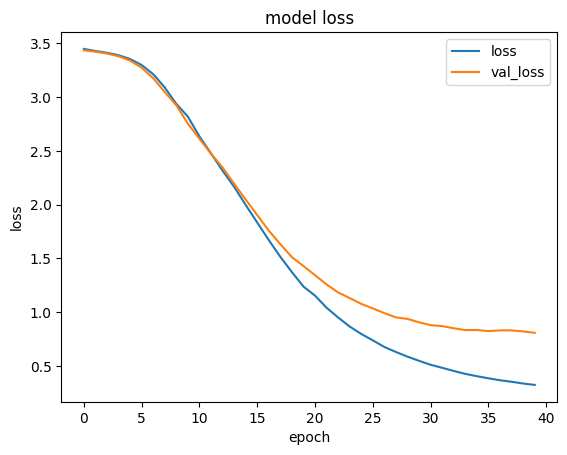

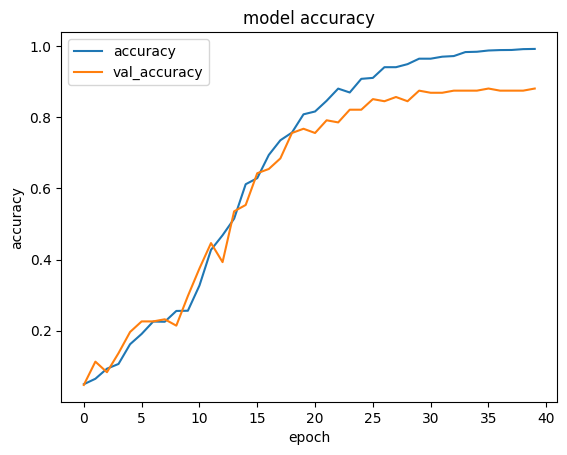

In [ ]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()


# **Evaluation**

In [ ]:
#accuracy calculation
loss_and_metrics = model.evaluate(padded,train_labels,batch_size=512)
print("The train accuracy is: "+str(loss_and_metrics[1]))
loss_and_metrics = model.evaluate(testing_padded,test_labels,batch_size=512)
print("The test accuracy is: "+str(loss_and_metrics[1]))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9956 - loss: 0.3135
The train accuracy is: 0.9946871399879456
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9298 - loss: 0.6151
The test accuracy is: 0.9268656969070435


In [ ]:
predictions = model.predict(testing_padded)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [ ]:
predictions = np.argmax(predictions, axis=-1)

In [ ]:
test_labels=np.argmax(test_labels, axis=-1)

In [ ]:
precision, recall, fscore, _ = precision_recall_fscore_support(test_labels,predictions, average='weighted')
print("Precision :"+str(precision))
print("Recall :"+str(recall))
print("fscore :"+str(fscore))

Precision :0.9250276013015978
Recall :0.926865671641791
fscore :0.9188975675581169


# ***Error analysis Misclassification Samples with Confidence + Count Misclassifications per Class ***

In [ ]:
import numpy as np

# Get predicted probabilities (softmax outputs)
pred_probs = model.predict(testing_padded)

# True labels (already decoded from one-hot)
true_labels = test_labels  # numeric labels (not one-hot)

# Indices of misclassified samples
misclassified_idx = np.where(predictions != true_labels)[0]

# Count misclassifications per true class
from collections import Counter
misclass_counts = Counter(true_labels[misclassified_idx])

print("Misclassification counts per class:")
for label, count in misclass_counts.items():
    print(f"Class '{label}': {count} misclassified samples")

# Show some misclassified samples (up to 5) with confidence
print("\nExamples of misclassified samples:")
for idx in misclassified_idx[:5]:
    quote_text = test_sentences[idx]
    true_label = true_labels[idx]
    pred_label = predictions[idx]
    confidence = pred_probs[idx][pred_label]

    print(f"Quote: {quote_text}")
    print(f"True label: {true_label}, Predicted label: {pred_label}, Confidence: {confidence:.3f}")
    print("-----")


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
Misclassification counts per class:
Class '16': 21 misclassified samples
Class '3': 2 misclassified samples
Class '17': 4 misclassified samples
Class '12': 4 misclassified samples
Class '15': 4 misclassified samples
Class '9': 3 misclassified samples
Class '14': 3 misclassified samples
Class '25': 3 misclassified samples
Class '10': 2 misclassified samples
Class '18': 2 misclassified samples
Class '7': 1 misclassified samples

Examples of misclassified samples:
Quote: “Tomar moner kotha aaj amake khule bolo amar hatta dhore samner pothe agiye cholo pechon fire ar amra dekhbo na Kono bipoder poroya amra korbo na “
True label: 16, Predicted label: 21, Confidence: 0.555
-----
Quote: তোমায় আমি বলতে চাই,তুমি ছাড়া প্রিয় আর কেহ নাই। ভালবাসি শুধু তোমায় আমি,জনম জনম ভালবাসতে চাই।
True label: 16, Predicted label: 25, Confidence: 0.494
-----
Quote: যে কাউকেই ভালোবাসা যায়। ভালোবাসা অনেক পবিত্র একটি অনুভূতি। স্বার্থসিদ্ধির জন্যও প্রেম করা উচিত নয়। প্রেম হচ্ছ

In [ ]:
from collections import Counter
import numpy as np

# Assuming:
# predictions = np.argmax(predictions_probabilities, axis=-1)
# true_labels = np.argmax(test_labels, axis=-1)  # if still one-hot, else just test_labels

# Find indices where prediction != true label
misclassified_idx = np.where(predictions != true_labels)[0]

# Extract true labels of those misclassified samples
misclassified_true_labels = true_labels[misclassified_idx]

# Count misclassifications per true class
misclass_counts = Counter(misclassified_true_labels)

# Total number of classes with at least one misclassification
total_misclass_classes = len(misclass_counts)

print(f"Total classes with misclassifications: {total_misclass_classes}\n")

print("Misclassification counts per class:")
for cls, count in misclass_counts.items():
    print(f"Class {cls}: {count} misclassified samples")


Total classes with misclassifications: 11

Misclassification counts per class:
Class 16: 21 misclassified samples
Class 3: 2 misclassified samples
Class 17: 4 misclassified samples
Class 12: 4 misclassified samples
Class 15: 4 misclassified samples
Class 9: 3 misclassified samples
Class 14: 3 misclassified samples
Class 25: 3 misclassified samples
Class 10: 2 misclassified samples
Class 18: 2 misclassified samples
Class 7: 1 misclassified samples


# **Confusion Matrix & Classification Report**

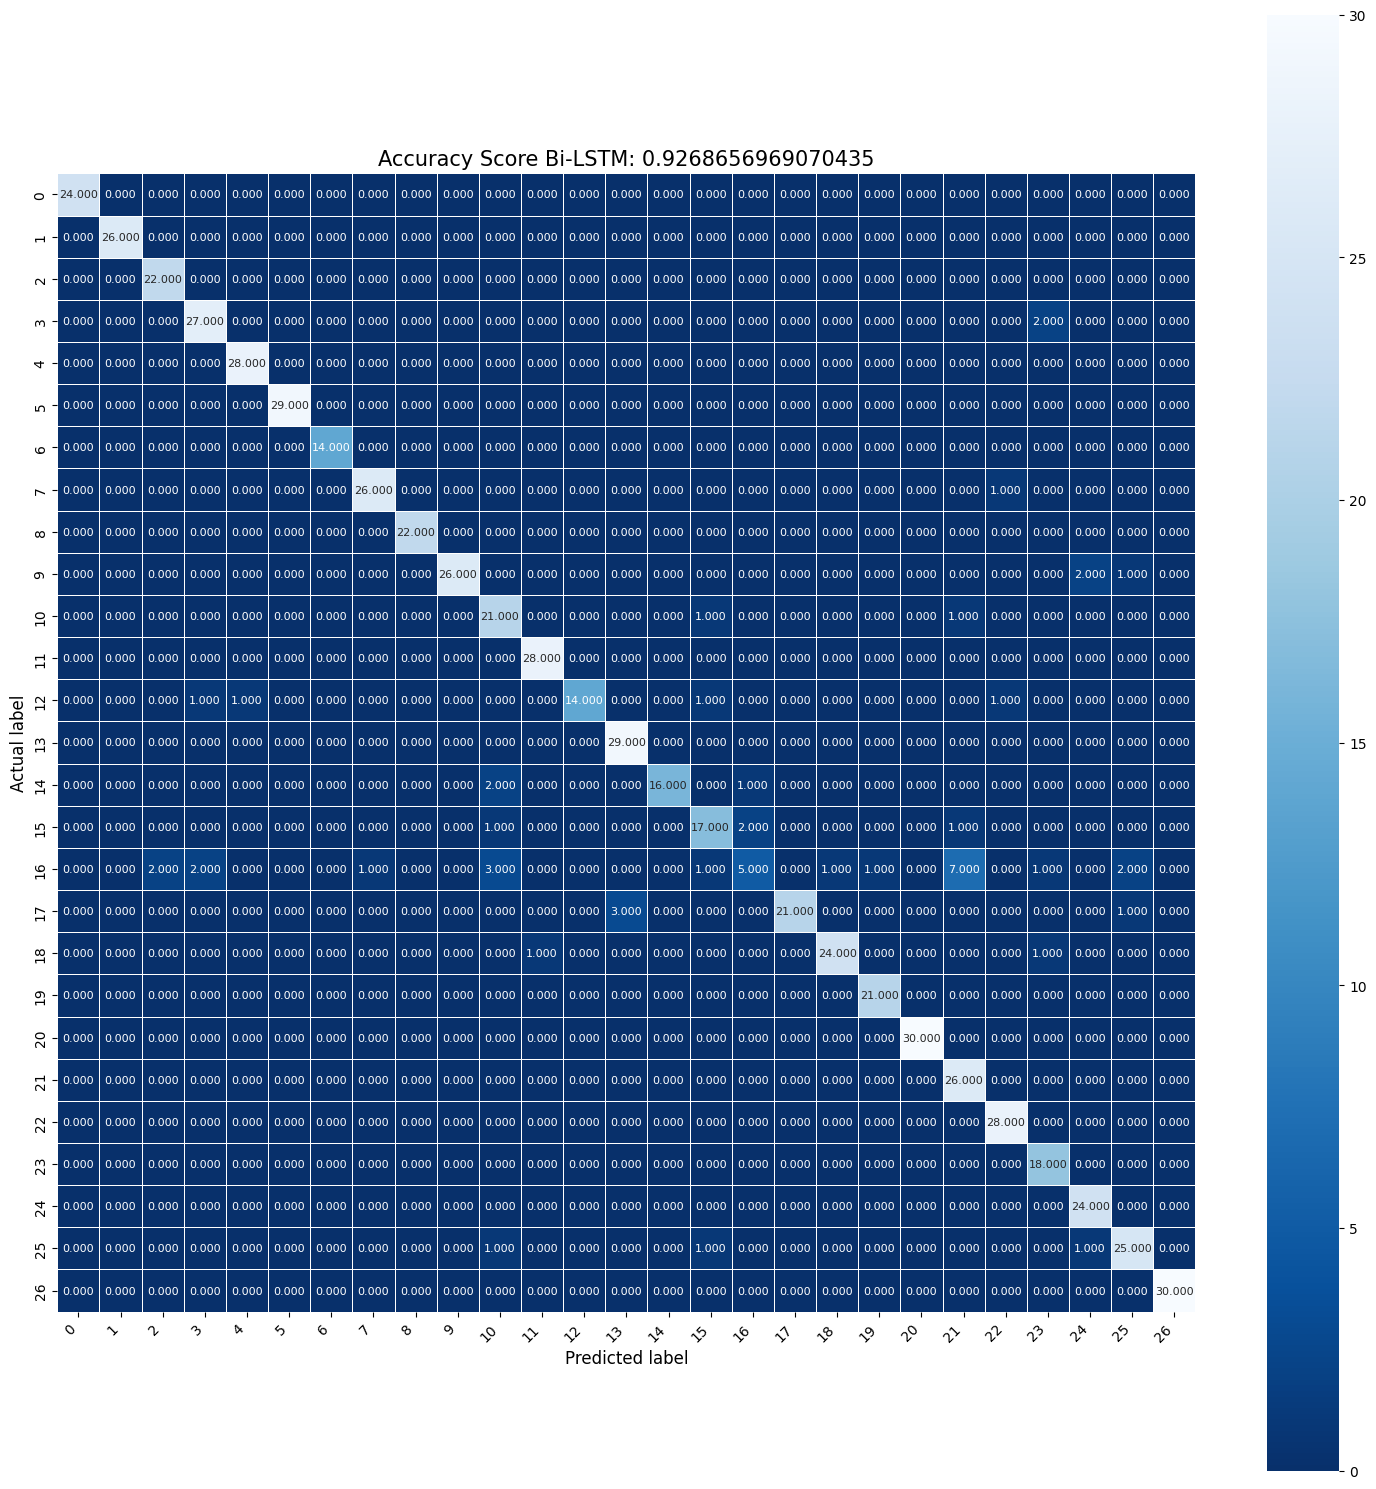

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Assuming you have already calculated cm and loss_and_metrics
cm = metrics.confusion_matrix(test_labels, predictions)

# Adjust figure size to accommodate 27 levels
plt.figure(figsize=(15, 15))

# Create the heatmap with smaller annotation font size and clearer separation
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r',
            annot_kws={"size": 8})  # Adjust annotation font size

# Add labels with rotation for clarity
plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)

# Rotate the x-tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add the title with a larger font size
all_sample_title = 'Accuracy Score Bi-LSTM: {0}'.format(loss_and_metrics[1])
plt.title(all_sample_title, size=15)

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything
plt.show()



In [ ]:
report = pd.DataFrame(classification_report(y_true = test_labels, y_pred = predictions, output_dict=True)).transpose()
# report = report.rename(index={'0': 'economy','1':'sports','2':'international','3':'state','4':'technology','5':'entertainment','6':'education'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
display(report)

,precision,recall,f1-score,support
0,100.00,100.00,100.00,24.000000
1,100.00,100.00,100.00,26.000000
2,91.67,100.00,95.65,22.000000
3,90.00,93.10,91.53,29.000000
4,96.55,100.00,98.25,28.000000
5,100.00,100.00,100.00,29.000000
6,100.00,100.00,100.00,14.000000
7,96.30,96.30,96.30,27.000000
8,100.00,100.00,100.00,22.000000
9,100.00,89.66,94.55,29.000000
